In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
validation_size = 0.2
seed = 7
X = 2 - 3*np.random.normal(0,1,20)

In [4]:
X.shape

(20,)

In [5]:
Y = X - 2 *(X**2)+0.5*(X**3) + np.exp(-X) + np.random.normal(-3,3,20)

In [9]:
Y.shape

(20,)

In [10]:
X = X[:,np.newaxis]
Y = Y[:,np.newaxis]

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = validation_size,random_state=seed)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures

In [23]:
#선형 회귀모델
model = LinearRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_train)
rmse_lin = np.sqrt(mean_squared_error(Y_train,Y_pred))
r2_lin = r2_score(Y_train,Y_pred)
print("RMSE for Linear Regression:",rmse_lin)

RMSE for Linear Regression: 17.54016553674847


In [24]:
#다항식 회귀모델
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)
model = LinearRegression()
model.fit(x_poly,Y_train)
Y_poly_pred = model.predict(x_poly)
rmse = np.sqrt(mean_squared_error(Y_train,Y_poly_pred))
r2 = r2_score(Y_train,Y_poly_pred)
print("RMSE for Polynomial Regression:",rmse)

RMSE for Polynomial Regression: 12.172313146906653


(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

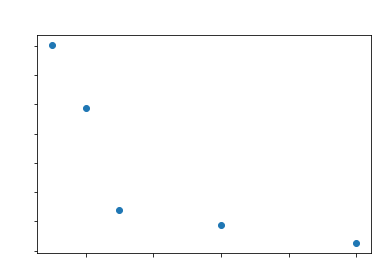

In [28]:
#train으로 다항식 최적 찾아보기 
Deg = [1,2,3,6,10]
results = []
names = []
for deg in Deg:
    polynomial_features = PolynomialFeatures(degree=deg)
    x_poly = polynomial_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(x_poly,Y_train)
    Y_poly_pred = model.predict(x_poly)
    rmse = np.sqrt(mean_squared_error(Y_train,Y_poly_pred))
    r2 = r2_score(Y_train,Y_poly_pred)
    results.append(rmse)
    names.append(deg)
plt.plot(names,results,'o')
plt.suptitle("Algorithm Comparison",color = 'white')
plt.xticks(color = 'white')
plt.yticks(color = 'white')

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

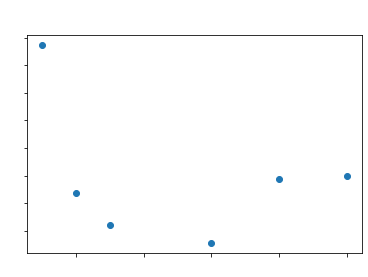

In [30]:
#train에서 최적과 비교해 test셋으로 최적 다항식 찾기(result : 6차)
Deg = [1,2,3,6,8,10]
results_test = []
names_test = []
for deg in Deg:
    polynomial_features = PolynomialFeatures(degree=deg)
    x_poly = polynomial_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(x_poly,Y_train)
    x_poly_test = polynomial_features.fit_transform(X_test)
    Y_poly_pred_test = model.predict(x_poly_test)
    rmse = np.sqrt(mean_squared_error(Y_test,Y_poly_pred_test))
    r2 = r2_score(Y_test,Y_poly_pred_test)
    results_test.append(rmse)
    names_test.append(deg)
plt.plot(names_test,results_test,'o')
plt.suptitle("Algorithm Comparison",color = 'white')
plt.xticks(color = 'white')
plt.yticks(color = 'white')

In [32]:
#피클은 훈련된 모델을 저장하고 불러오는 모듈
from pickle import dump,load
#모델을 디스크에 저장
filename = 'finalized_model.sav'
dump(model,open(filename,'wb'))

In [33]:
#디스크에서 모델 불러오기
loaded_model = load(filename)

TypeError: file must have 'read' and 'readline' attributes

CHAPTER 3 인공 신경망
![뉴런](image/IMG_AA48C55A01B9-1.jpeg)
은닉층 개수에 따라 단층,다층,심층(3개 이상) 신경망으로 나뉜다.
하나의 층에서 오는 단순 특성이 다음 층과 결합해 더 복잡한 특성을 만들어간다.
![은닉층](image/87599d0b-1a31-4f36-8ca3-53f525bd9df1.png)


In [10]:
import tensorflow as tf

In [13]:
model =tf.keras.models.Sequential()

In [9]:
keras.__version__

NameError: name 'keras' is not defined